In [2]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [14]:
centers = [[1,1],[-1,-1],[1,-1]]
X, label_true = make_blobs(

    n_samples=750,
    centers=centers,
    cluster_std=0.4,
    random_state=0

)
X = StandardScaler().fit_transform(X)

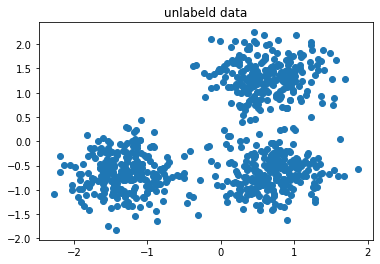

In [22]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1])
plt.title("unlabeld data")
plt.show()
x = X[:,0]
y = X[:,1]

In [25]:
import pandas as pd
pd.value_counts(label_true)

0    250
1    250
2    250
dtype: int64

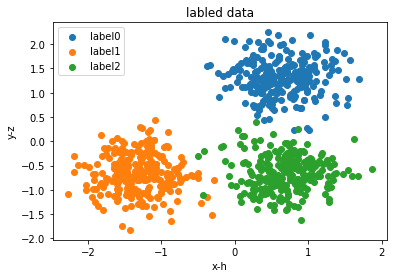

In [29]:
fig1 = plt.figure()
label0 = plt.scatter(X[:,0][label_true==0],X[:,1][label_true==0])
label1 = plt.scatter(X[:,0][label_true==1],X[:,1][label_true==1])
label2 = plt.scatter(X[:,0][label_true==2],X[:,1][label_true==2])

plt.title("labled data")
plt.xlabel('x-h')
plt.ylabel('y-z')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.show()

In [30]:
print(X.shape,label_true.shape)

(750, 2) (750,)


In [31]:
# set the model
from sklearn.cluster import KMeans
KM = KMeans(n_clusters = 3, random_state=0)
KM.fit(X)

KMeans(n_clusters=3, random_state=0)

In [32]:
centers = KM.cluster_centers_
print(centers)

[[-1.30266211 -0.65704205]
 [ 0.62260555  1.3172598 ]
 [ 0.6954587  -0.64442334]]


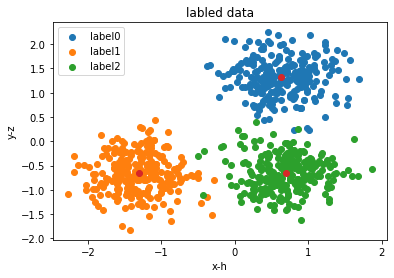

In [33]:
fig2 = plt.figure()
label0 = plt.scatter(X[:,0][label_true==0],X[:,1][label_true==0])
label1 = plt.scatter(X[:,0][label_true==1],X[:,1][label_true==1])
label2 = plt.scatter(X[:,0][label_true==2],X[:,1][label_true==2])

plt.title("labled data")
plt.xlabel('x-h')
plt.ylabel('y-z')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [36]:
y_predict = KM.predict(X)
print(pd.value_counts(y_predict),pd.value_counts(label_true))

0    252
2    250
1    248
dtype: int64 0    250
1    250
2    250
dtype: int64


In [37]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label_true,y_predict))

0.328


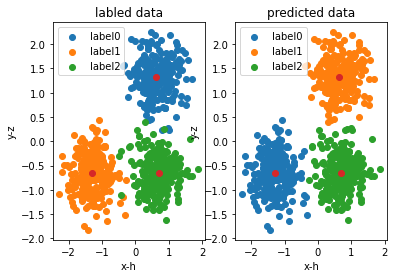

In [38]:
fig3 = plt.subplot(121)
label0 = plt.scatter(X[:,0][label_true==0],X[:,1][label_true==0])
label1 = plt.scatter(X[:,0][label_true==1],X[:,1][label_true==1])
label2 = plt.scatter(X[:,0][label_true==2],X[:,1][label_true==2])

plt.title("labled data")
plt.xlabel('x-h')
plt.ylabel('y-z')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])

fig3 = plt.subplot(122)
label0 = plt.scatter(X[:,0][y_predict==0],X[:,1][y_predict==0])
label1 = plt.scatter(X[:,0][y_predict==1],X[:,1][y_predict==1])
label2 = plt.scatter(X[:,0][y_predict==2],X[:,1][y_predict==2])

plt.title("predicted data")
plt.xlabel('x-h')
plt.ylabel('y-z')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])

plt.show()

In [17]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics


In [ ]:
db = DBSCAN(eps=0.3,min_samples=10).fit(X)
labels = db.labels_

In [ ]:
# Number of clusters in labels, ignoring noise if present

In [19]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [20]:
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise point: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise point: 18


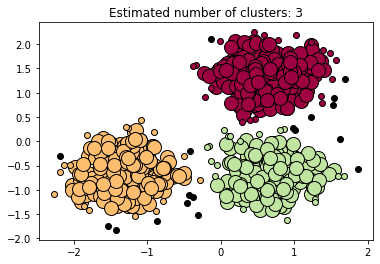

In [21]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()